In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations

LOADING THE DATASET

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


age: age in years

2. sex: 1 = male; 0 = female

3. cp: chest pain type

- Value 1: typical angina

- Value 2: atypical angina

- Value 3: non-anginal pain

- Value 4: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholesterols in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg: resting electrocardiographic results

- Value 0: normal

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

- Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

- Value 1: upsloping

- Value 2: flat

- Value 3: Downsloping

12. ca: number of major vessels (0–3) colored by fluoroscopy

13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

In [ ]:

# Select features based on correlation with the target variable
target_corr = abs(corr_matrix['target_variable']).sort_values(ascending=False)
selected_features = target_corr[target_corr > 0.5].index.tolist()
print("Selected Features:", selected_features)

age vs heart disease

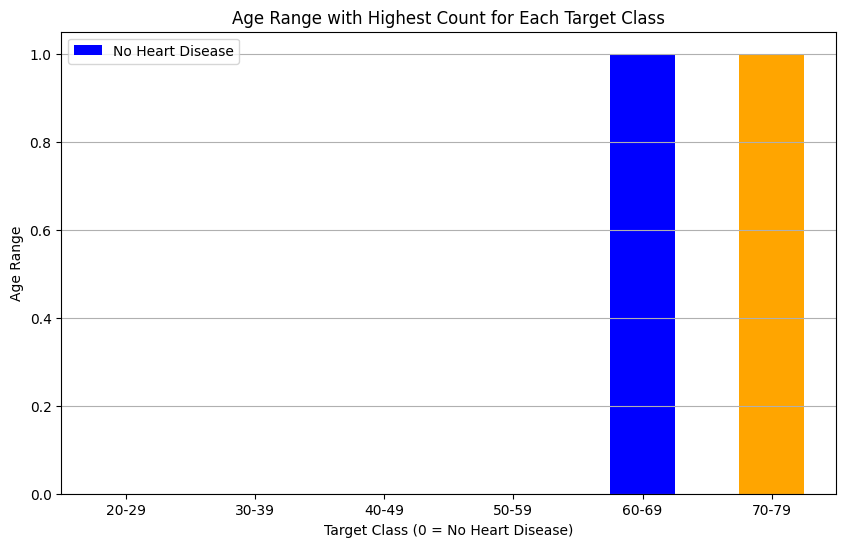

In [ ]:
data['age_bin'] = pd.cut(data['Age'], bins=range(20, 90, 10), labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

age_by_target_bin = data.groupby(['HeartDisease', 'age_bin']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
age_by_target_bin.idxmax().plot(kind='bar', color=['blue', 'orange'])
plt.title('Age Range with Highest Count for Each Target Class')
plt.xlabel('Target Class (0 = No Heart Disease)')
plt.ylabel('Age Range')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

<Axes: xlabel='HeartDisease'>

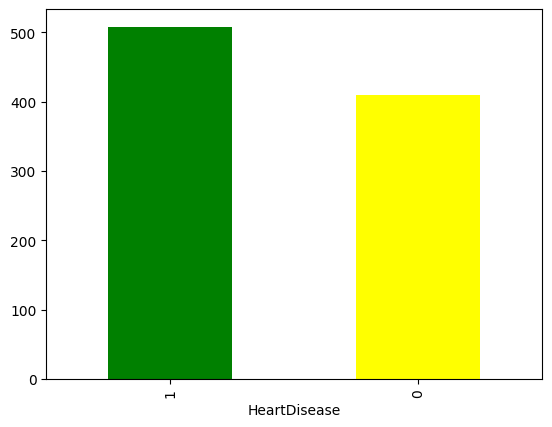

In [ ]:
data['HeartDisease'].value_counts().plot(kind='bar',color=['green','yellow'])

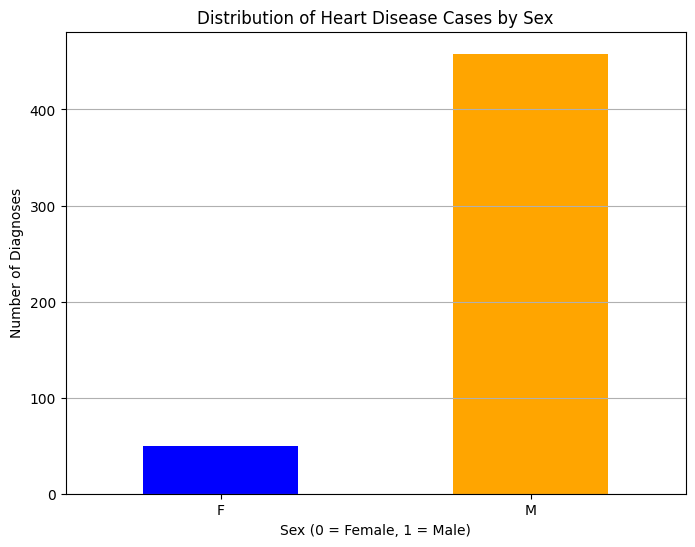

In [ ]:
diagnosis_by_sex = data.groupby('Sex')['HeartDisease'].sum()

# Plotting the count of diagnoses by sex
plt.figure(figsize=(8, 6))
diagnosis_by_sex.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Heart Disease Cases by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Number of Diagnoses')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
print(data.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


checking for outliers in numerical values

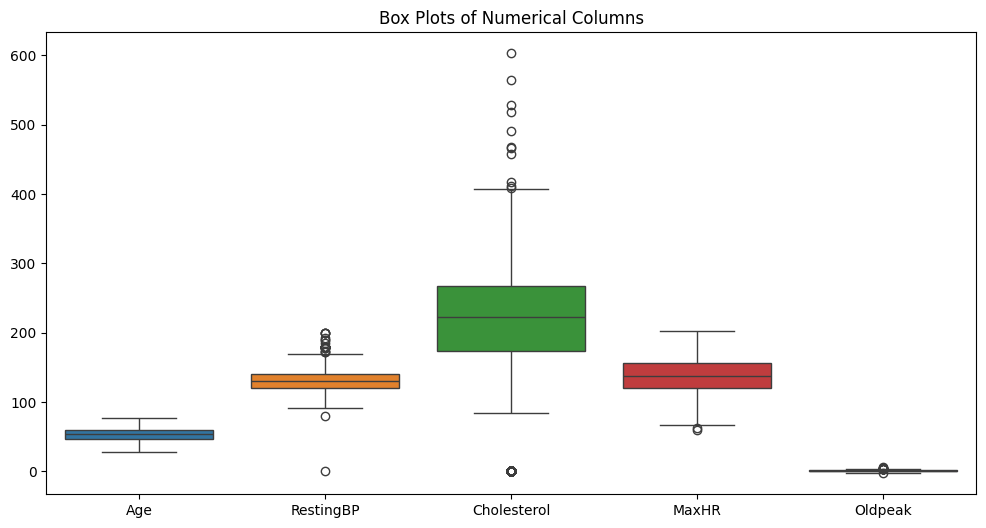

In [ ]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plots of Numerical Columns')
plt.show()

handling the outliers

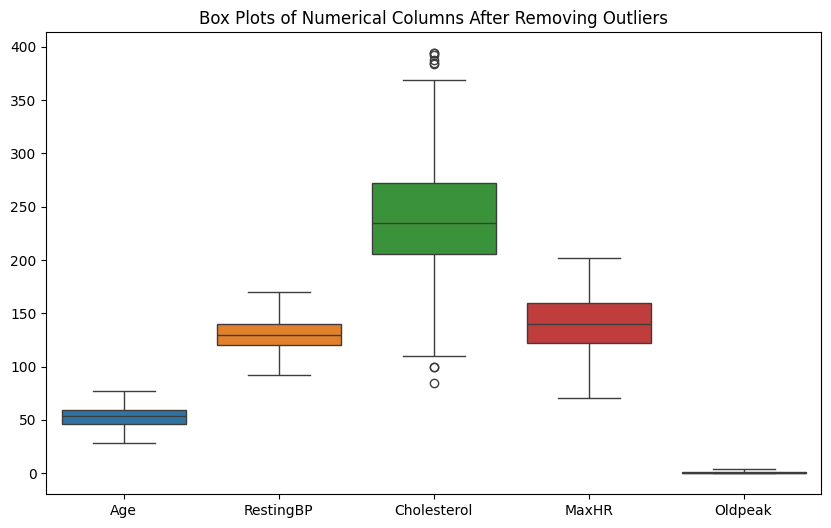

In [ ]:
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]

# Box plot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plots of Numerical Columns After Removing Outliers')
plt.show()

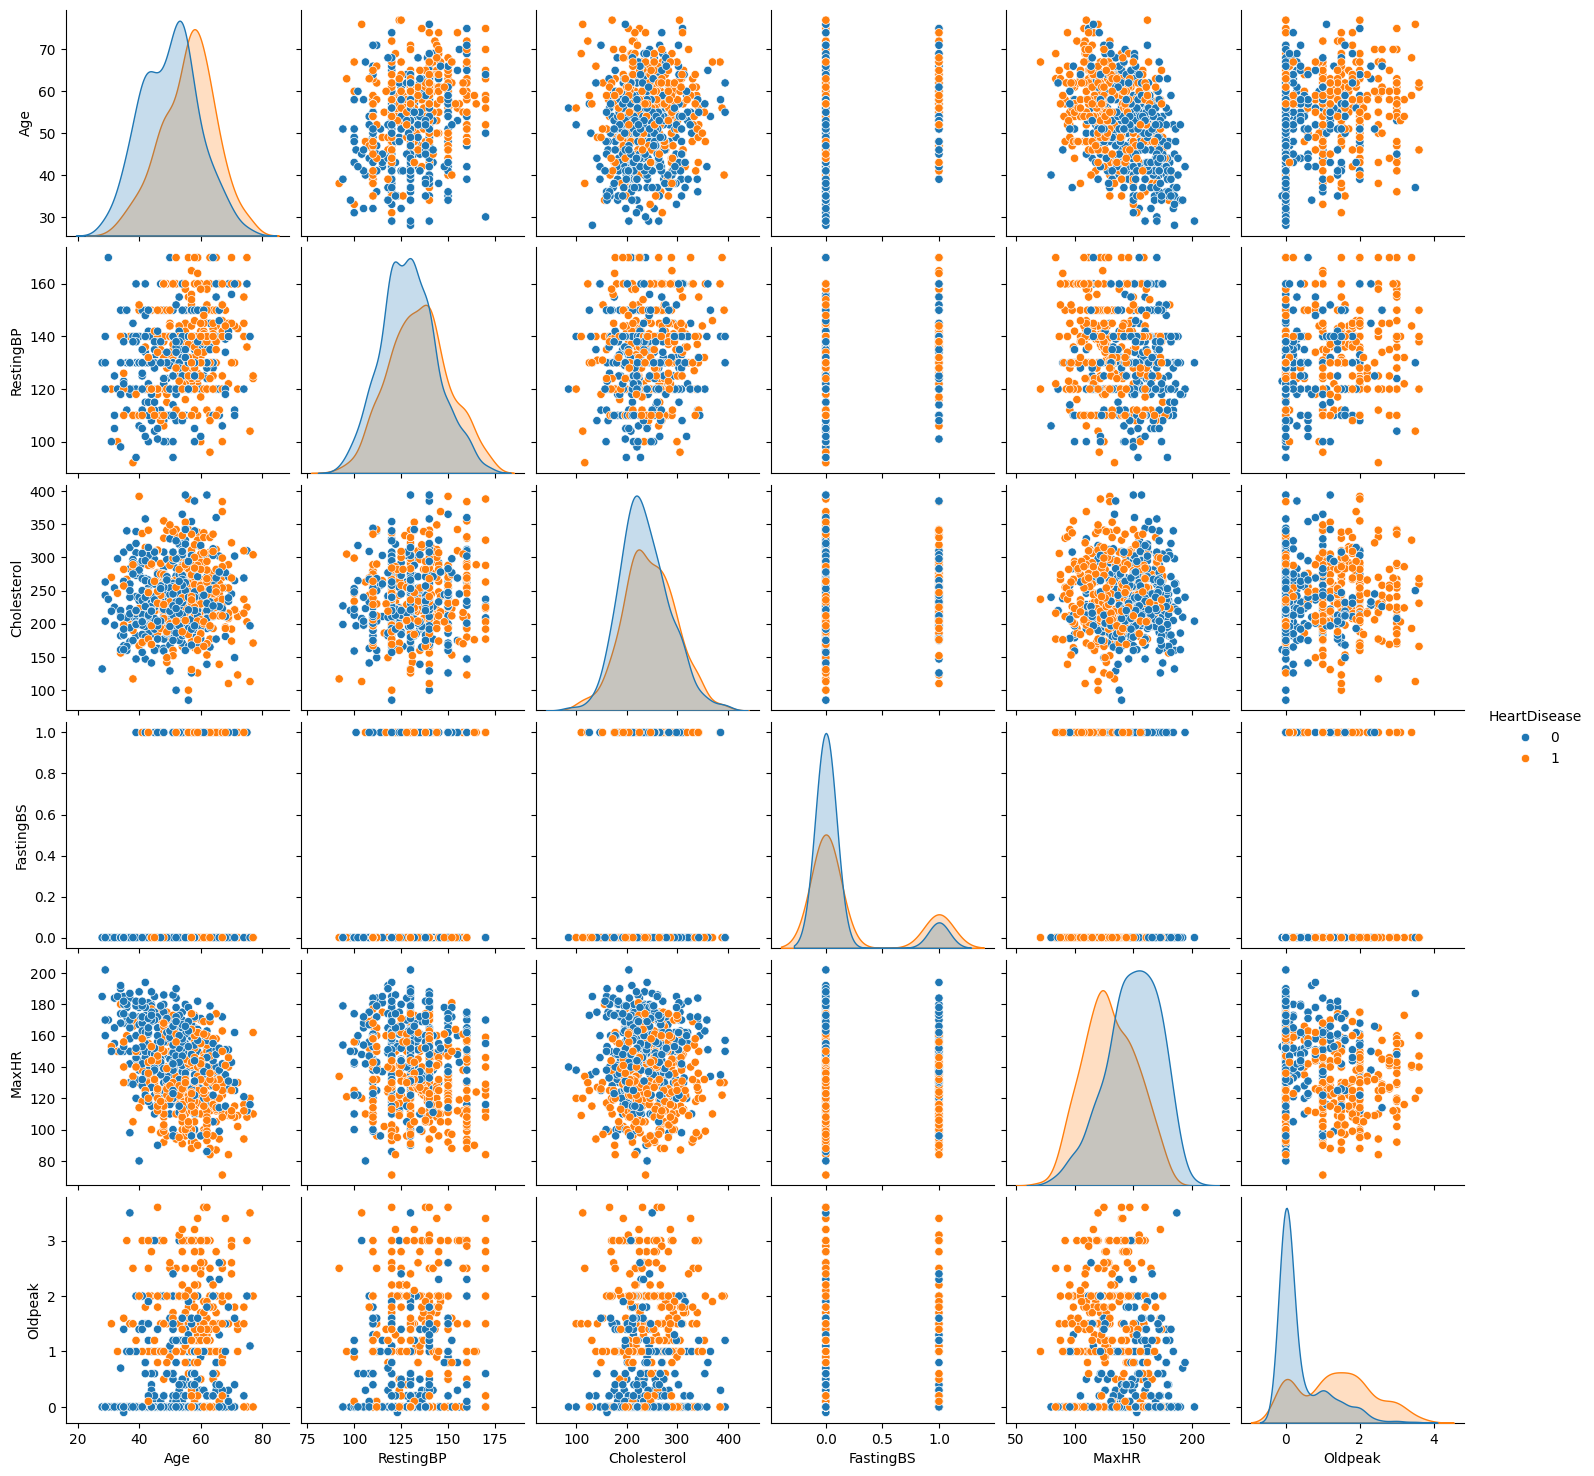

ValueError: could not convert string to float: 'M'

In [ ]:
sns.pairplot(data, hue='HeartDisease')
plt.show()
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
numerical_columns = ['Age', 'RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']


Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
outliers = ((data[numerical_columns] < (Q1 - outlier_threshold * IQR)) | (data[numerical_columns] > (Q3 + outlier_threshold * IQR)))

outliers_rows = data[outliers.any(axis=1)]
print(outliers_rows)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
78    52   M           ATA        140          100          0     Normal   
98    56   M           ASY        120           85          0     Normal   
102   40   F           ASY        150          392          0     Normal   
132   56   M           ASY        170          388          0         ST   
256   55   F           ATA        130          394          0        LVH   
444   56   M           ASY        120          100          0     Normal   
498   67   M           ASY        160          384          1         ST   
613   58   M           ASY        140          385          1        LVH   
803   62   F           ASY        140          394          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
78     138              Y      0.0       Up             0  
98     140              N      0.0       Up             0  
102    130              N      2.0     Flat             1  

ONE HOT ENCODING

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(data, columns=['Sex','ChestPainType', 'RestingECG', 'ST_Slope','ExerciseAngina'], drop_first=True)


In [ ]:
df.shape

(701, 63)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 917
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RestingBP          701 non-null    int64  
 1   Cholesterol        701 non-null    int64  
 2   FastingBS          701 non-null    int64  
 3   MaxHR              701 non-null    int64  
 4   Oldpeak            701 non-null    float64
 5   HeartDisease       701 non-null    int64  
 6   Sex_M              701 non-null    bool   
 7   Age_29             701 non-null    bool   
 8   Age_30             701 non-null    bool   
 9   Age_31             701 non-null    bool   
 10  Age_32             701 non-null    bool   
 11  Age_33             701 non-null    bool   
 12  Age_34             701 non-null    bool   
 13  Age_35             701 non-null    bool   
 14  Age_36             701 non-null    bool   
 15  Age_37             701 non-null    bool   
 16  Age_38             701 non-null

In [ ]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'age_bin_30-39', 'age_bin_40-49',
       'age_bin_50-59', 'age_bin_60-69', 'age_bin_70-79', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'ExerciseAngina_Y',
       'age_bin_30-39', 'age_bin_40-49', 'age_bin_50-59', 'age_bin_60-69',
       'age_bin_70-79'],
      dtype='object')

splitting target and other columns

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Normalizing the data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,Age_29,Age_30,Age_31,...,Age_76,Age_77,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y
0,140,289,0,172,0.0,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,160,180,0,156,1.0,1,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
2,130,283,0,98,0.0,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
3,138,214,0,108,1.5,1,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
4,150,195,0,122,0.0,0,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False


Logistic Regression:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='saga', max_iter=1000)

# Fit the model to your scaled data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8794326241134752
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        67
           1       0.88      0.89      0.89        74

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141

Confusion Matrix:
 [[58  9]
 [ 8 66]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8553571428571428
Testing Accuracy: 0.8794326241134752


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


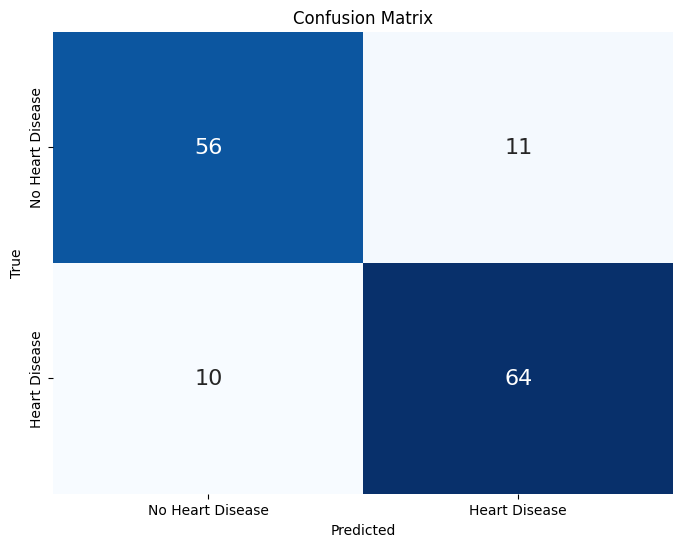

Classification Report:
                   precision    recall  f1-score   support

No Heart Disease       0.85      0.84      0.84        67
   Heart Disease       0.85      0.86      0.86        74

        accuracy                           0.85       141
       macro avg       0.85      0.85      0.85       141
    weighted avg       0.85      0.85      0.85       141



In [ ]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16},
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", report)

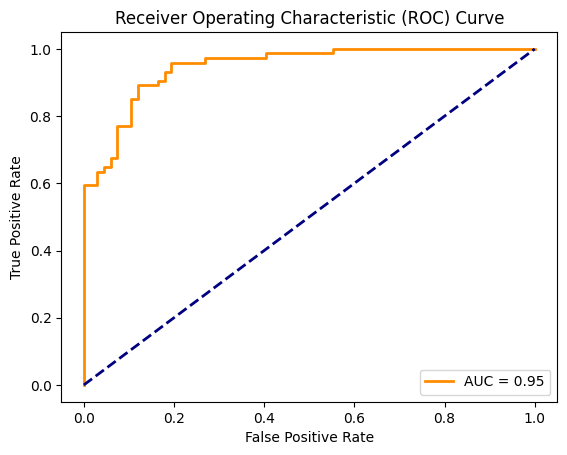

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)


print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8794326241134752
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        67
           1       0.86      0.92      0.89        74

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141

SVM Confusion Matrix:
 [[56 11]
 [ 6 68]]


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.900709219858156
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        67
           1       0.89      0.92      0.91        74

    accuracy                           0.90       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.90      0.90      0.90       141

Random Forest Confusion Matrix:
 [[59  8]
 [ 6 68]]


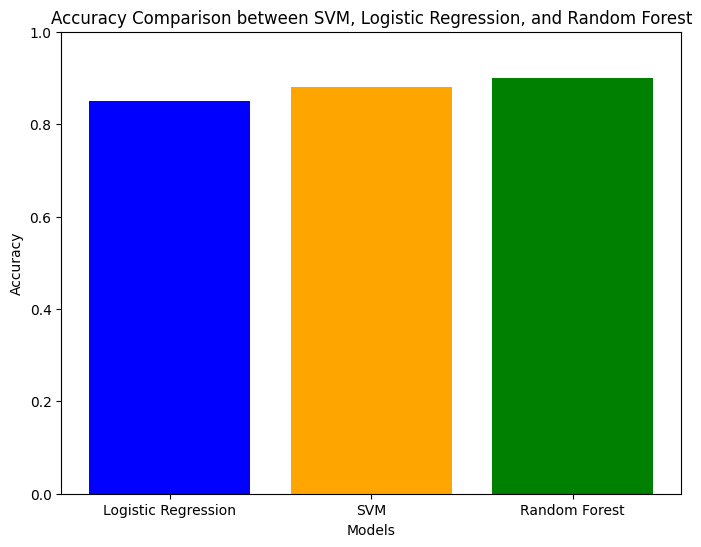

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test_scaled))

svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test_scaled))
plt.figure(figsize=(8, 6))
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [logistic_accuracy, svm_accuracy, rf_accuracy]
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between SVM, Logistic Regression, and Random Forest')
plt.ylim(0, 1)
plt.show()
